***
**Tutorial 2 for Chapter 3**

Case study 10: Mining data on user's frequent areas of activity
***
<font color = 'darkred'>*Reference:*
<font color = 'darkred'>*数据挖掘原理与应用*

<!-- Acknowledgement:  
**i2DM (Tan, Steinbach, Kumar (2018) Introduction to Data Mining , 2nd Ed, Pearson )** Pearson Press   -->
For the tutorial course of AMA546 Statistical Data Mining   
Lecturer: Mr. Qiuyi Huang
PolyU, HKSAR

***Contents*** 
1. Objectives of the analysis
2. Description of the data
3. Exploratory data analysis (based on original dataset)
4. Data preprocessing
5. Hierachical clustering
6. Summary report
  - 6.1 Objectives
  - 6.2 Organisation of the data
  - 6.3 Exploratory data analysis:
  - 6.4 Model specification

# Objectives of the analysis

'DBSCAN.csv' is a 288$\times$3 table, which consists of the geolocation data (x,y) of a user recorded every five minutes in a day. Every sample represents a geolocation point at a
specific time. </br>

Our **object** is to utilize the geolocations provided below to identify the areas by DBSCAN where the user is most active and summarize our findings accordingly.

# Description of the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt# Description of the data 
from sklearn.cluster import DBSCAN

In [3]:
# Read the dataset
data = pd.read_csv('/Users/qiuyi/Desktop/Github_Repository/Statistical_Data_Mining_Tutorials/Case study 10 Mining data on user\'s frequent areas of activity by DBSCAN/DBSCAN.csv',
                  encoding='utf8', engine='python')

**Notes**: In this tutorial, we choose the *absolute path* to import csv file. Absolute path is a hierarchical path that locates a file or folder in a file system starting from the root such as '/root/.../xxx.csv', it is accurate. </br>

We also can choose *relative path*. Relative path describes the location of a file relative to the current (working) directory
- './' means that the current directory and the file directory are in the same directory.
- '../' means go up one level, which means the target file is at a higher directory than the current file.
- '../../' means go up two level, just equal to implement '../' twice.


In [7]:
data.head()

,time,x,y
0,00:00,1.010065,1.015373
1,00:05,1.007142,1.005767
2,00:10,1.010765,1.005684
3,00:15,1.008393,1.008145
4,00:20,1.004085,1.015046


Let's see the dimension of this dataset.

In [8]:
data.shape

(288, 3)

<!-- Rename the title '时间' to 'time'. -->

In [9]:
# data.rename(columns={'时间': 'time'},inplace=True)
# data.head() 

See types of attributes.

In [10]:
data.dtypes

time     object
x       float64
y       float64
dtype: object

#  Exploratory data analysis (based on original dataset)

In [11]:
data.describe()

,x,y
count,288.000000,288.000000
mean,8.923721,3.731517
std,8.142161,2.793233
min,1.000965,1.001381
25%,1.015438,1.013569
50%,11.003421,1.776322
75%,11.601037,7.005497
max,27.965653,7.434636


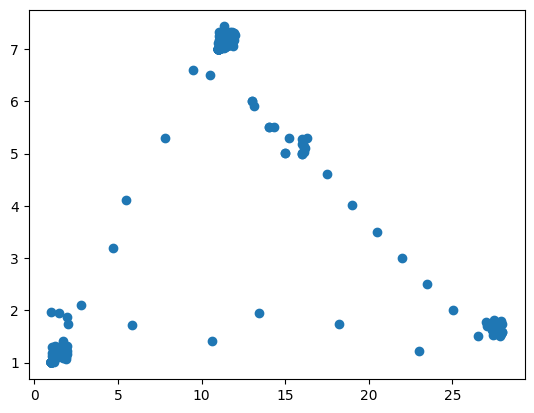

In [12]:
plt.figure() # Create a blank canvas
plt.scatter(
    data['x'],
    data['y'])

<!-- The scatter plot shows the areas the person has been to, and the bigger clusters, the more frequent areas the person has been to. So we found that there is mainly 4 areas this specific user. -->
By analyzing the scatter plot, we can identify the geographic locations that the user has visited, with larger clusters indicating areas that the user has frequented more often. Based on this analysis, we have found that the user has primarily visited four distinct areas, which could provide valuable insights into their travel patterns and preferences.

## DBSCAN algorithm

Recall this figure:

![/Users/ranjiang/Library/CloudStorage/OneDrive-TheHongKongPolytechnicUniversity/data mining/TUT_clustering/DBSCAN](fig_DBSCAN.png "DBSCAN" ) 
<!-- 此路径表示图片和MD文件，处于同一目录 -->
<!-- <img src = "/Users/ranjiang/Library/CloudStorage/OneDrive-TheHongKongPolytechnicUniversity/data mining/TUT_clustering/DBSCAN/fig_DBSCAN.png" style = "width: 200px"/> -->

- **MinPts**: a certain threshold that identifies different kinds of points
- **Core points**: These points are in the interior of a density-based cluster. A point is a core point if there are at least MinPts within a distance of Eps, where MinPts and Eps are userspecified parameters.
- **Border points**: A border point is not a core point, but falls within the neighbourhood of a core point.
- **Noise points**: A noise point is any point that is neither a core point nor a border point.

In [13]:
#Set parameters eps and min_samples
eps = 0.5
min_samples = 5 #MinPts

In [14]:
model = DBSCAN(eps=eps, min_samples = min_samples)

In [22]:
data['type'] = model.fit_predict(
    data[['x','y']]
)
data[140:150]

,time,x,y,type
140,11:40,11.006350,7.006574,1
141,11:45,11.000808,7.005455,1
142,11:50,11.004904,7.005528,1
143,11:55,11.005363,7.003178,1
144,12:00,11.001795,7.003857,1
145,12:05,13.003968,6.006318,-1
146,12:10,14.007290,5.502566,-1
147,12:15,15.009210,5.002812,-1
148,12:20,16.281027,5.296750,2
149,12:25,16.020301,5.015922,2


 0    119
 1    104
-1     29
 3     25
 2     11
Name: type, dtype: int64


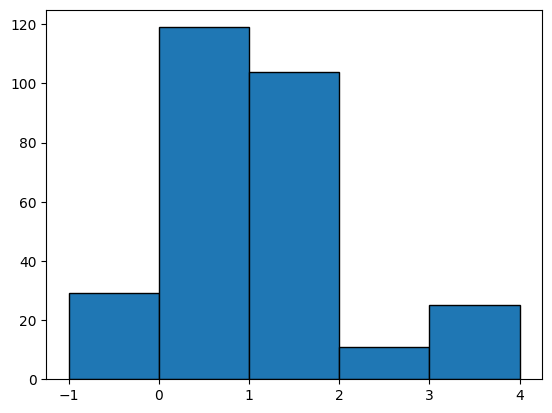

In [38]:
print(data['type'].value_counts())
plt.hist(df['type'], bins=range(int(df['type'].min()), int(df['type'].max()) + 2), edgecolor='black')
plt.show()

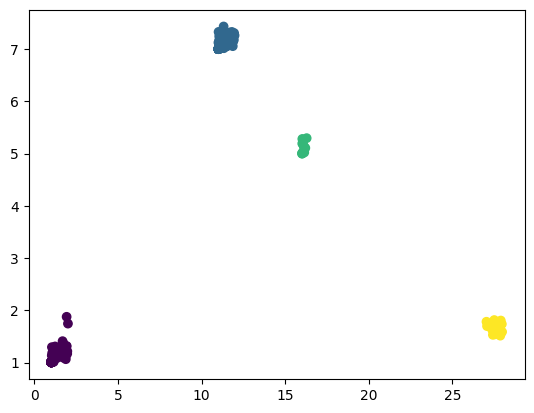

In [23]:
# Draw the clusters
plt.figure()
cluster1 = plt.scatter(
    data[data.type != -1]['x'],
    data[data.type != -1]['y'],
    c = data[data.type!=-1]['type']
)

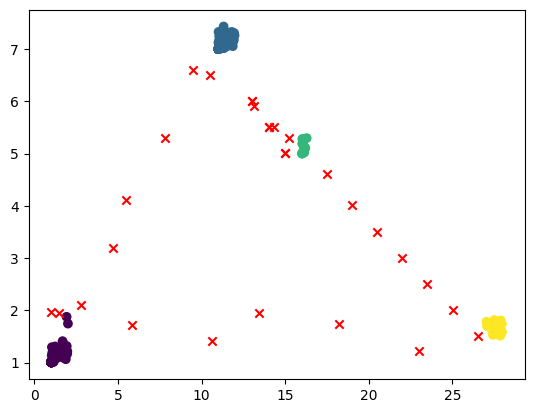

In [24]:
# Draw the clusters
plt.figure()
cluster1 = plt.scatter(
    data[data.type != -1]['x'],
    data[data.type != -1]['y'],
    c = data[data.type!=-1]['type']
)
# Add the noise points in red
# plt.figure()
plt.scatter(
    data[data.type == -1]['x'],
    data[data.type == -1]['y'],
    c = 'red', marker = 'x'
)
plt.show()

**Notes:** If we split cluster scatter plot part and noise scatter plot part into two cells, then noise cannot add the cluster plot directly, i.e.

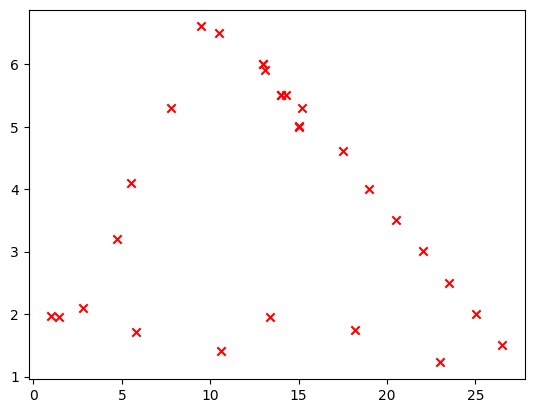

In [25]:
plt.scatter(
    data[data.type == -1]['x'],
    data[data.type == -1]['y'],
    c = 'red', marker = 'x'
)

Therefore, if we want to combine them, we need to put two scatter plots together in one cell.

# Summary report

## Objectives
The case study cluster a specific person's active regions, where we applied the **DBSCAN** model on slides *'Density and spectral'* p3-14.


## Organisation of the data
The data set contains a total of 287 samples and 3 attributes/variables/features time and locations (x, y).

## Exploratory data analysis：
<!-- In the course of the exploratory data analysis, we find that `Encourage` has a strong discriminating effect on whether high school students attend college or not. In addition, we also find through the boxplot that `Parent_income` also have a good discrimination effect. After that, we used one-hot encoder to preprocess the data, so that the dataset could be processed by the decision tree model. -->
The user's travel patterns and preferences can be deduced by analyzing the scatter plot, which displays the geographic locations they visited. Larger clusters on the scatter plot indicate frequent visits to certain areas. Our analysis shows that the user has visited mainly four distinct areas, which could provide significant insights into their travel preferences.

##  Model specification
The analysis objective suggested a clustering model that cluster a specific person's active regions by a common density clustering algorithm DBSCAN. There is an existing package sklearn.cluster, so we directly use this package to impelement clustering. We also can realize it manually, which has shown before.

<!-- ## Model comparison -->
<!-- Given that the Random Forest model is an **ensemble** method of the Decision Tree, we aim to build an optimal Decision Tree model based on the findings of Case Study 1: College Attending Plan Modeled by Decision Tree, and compare its performance with that of the Random Forest model on the testing set. By evaluating the **Accuracy** metric, we observe a slightly higher accuracy for the Random Forest model. Furthermore, upon examining the **Confusion Matrices**, we find that the Random Forest model outperforms the Decision Tree method in reducing the type 2 error rate, albeit at the cost of a slight increase in the type 1 error rate. We also observe that the **ROC curve** of the Random Forest model consistently outperforms that of the Decision Tree model, with a correspondingly higher **AUC score**. Overall, we conclude that the **Random Forest model exhibits superior classification performance compared to the Decision Tree model**, which further underscores the utility of ensemble methods in machine learning. -->